# DOCUMENTATION
## DELHI HOUSE PRICE DATA FROM MAGICBRICKS
### TASK:- TO PREDICT THE PRICE OF THE HOUSE USING THE FOLLOWING ATTRIBUTES
#### ATTRIBUTE ARE:-
1. Area:- area of the House in Sqft
2. BHK:- It is the count of BHK in a house (bedroom ,hall, kitchen)
3. Bathroom:- It is count of how many bathroom in the house.
4. Locality:- Particular Region in the city (for ex:- Rohini sec 25,citizen apartment sector 13)
5. Parking:- how many parking is available.
6. Price :price of the house
7. Status: it shows the availability time
8. Furnishing: house is furnished or not or semifurnished
9. Transaction: type of property(new or old)
10. Type:- type of house
11. Per_Sqft:- price of area per squarefeet.

## To predict the price of house we use Linear Regression algorithm .

### LINEAR REGRESSION:- 

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.


In [27]:
# import important library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load the data
df=pd.read_csv("C:/Users/ravim/Downloads/MagicBricks.csv")


In [29]:
# Elaborate data

In [30]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [31]:
df.shape

(1259, 11)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [33]:
df.columns


Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [34]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [35]:
cat_list = []
num_list = []

for variable in df.columns:
    if df[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)

print("Categorical Variables : ", cat_list, '\n')
print("Numerical Variables : ", num_list)

Categorical Variables :  ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type'] 

Numerical Variables :  ['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Per_Sqft']


In [36]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


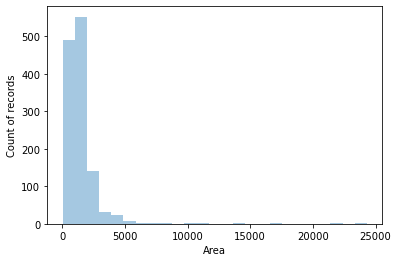

In [37]:
# area count
plt.ylabel('Count of records')
sns.distplot(df['Area'], bins=25, kde=False)
plt.show()

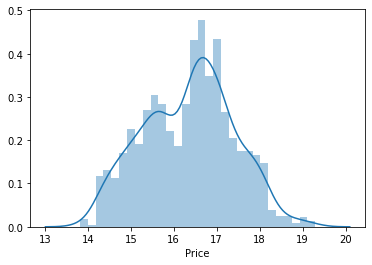

In [38]:
sns.distplot(np.log(df['Price']), bins=30)
plt.show()

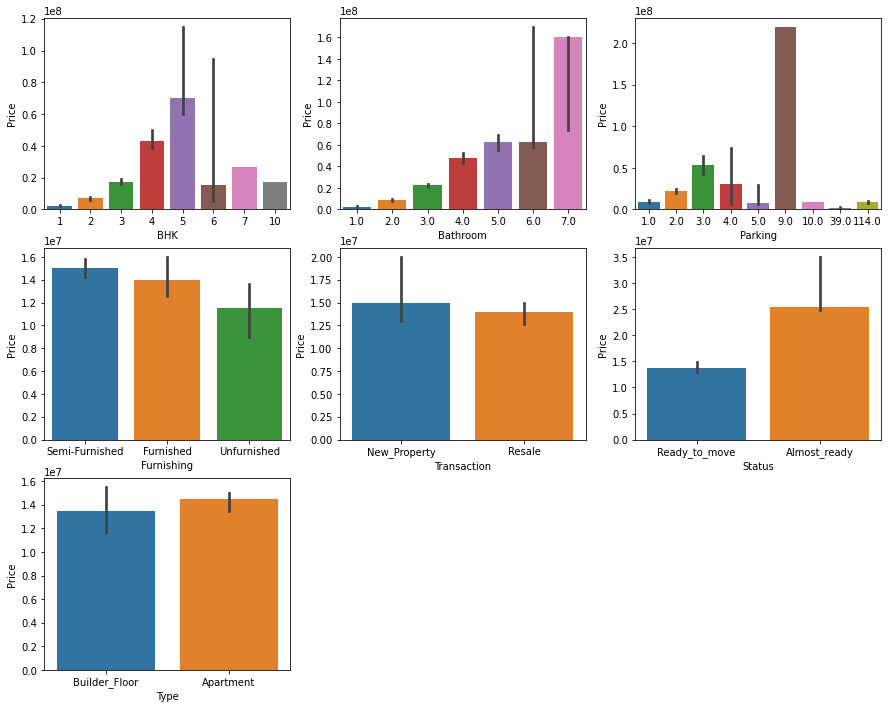

In [39]:
# plotting barplot for all variables against target variable
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
sns.barplot(x='BHK', y='Price', data=df, estimator=np.median)
plt.subplot(3,3,2)
sns.barplot(x='Bathroom', y='Price', data=df, estimator=np.median)
plt.subplot(3,3,3)
sns.barplot(x='Parking', y='Price', data=df, estimator=np.median)
plt.subplot(3,3,4)
sns.barplot(x='Furnishing',y='Price', data=df, estimator=np.median)
plt.subplot(3,3,5)
sns.barplot(x='Transaction',y='Price', data=df, estimator=np.median)
plt.subplot(3,3,6)
sns.barplot(x='Status',y='Price', data=df, estimator=np.median)
plt.subplot(3,3,7)
sns.barplot(x='Type',y='Price', data=df, estimator=np.median)
plt.show()

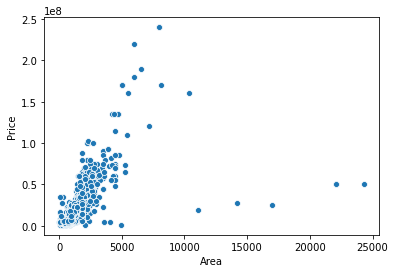

In [40]:
sns.scatterplot(x='Area',y='Price',data=df)
plt.show()

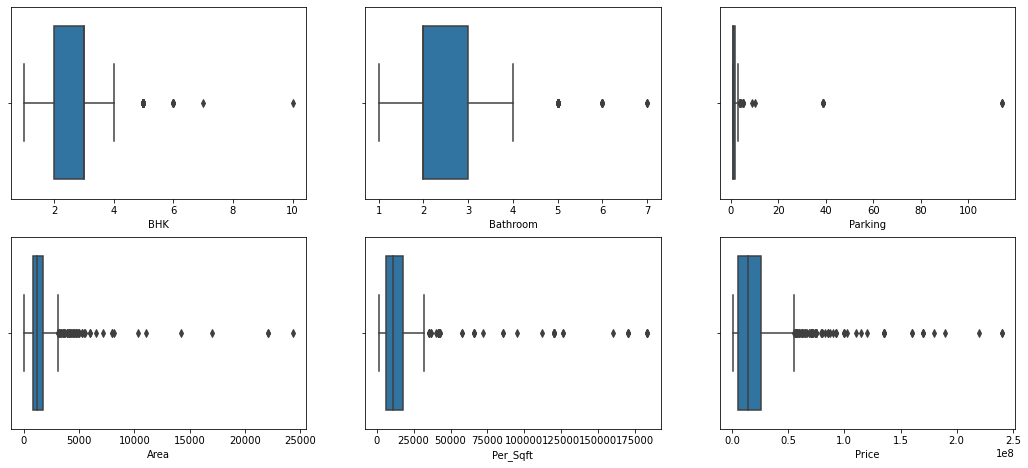

In [41]:
plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
sns.boxplot(df['BHK'])
plt.subplot(3,3,2)
sns.boxplot(df['Bathroom'])
plt.subplot(3,3,3)
sns.boxplot(df['Parking'])
plt.subplot(3,3,4)
sns.boxplot(df['Area'])
plt.subplot(3,3,5)
sns.boxplot(df['Per_Sqft'])
plt.subplot(3,3,6)
sns.boxplot(df['Price'])
plt.show()

In [42]:
dt = df[(df['BHK']<7)&(df['Bathroom']<6)&(df['Parking']<9)&(df['Area']<10000)]
print('Previous dataset shape:', df.shape)
print('New dataset shape:',dt.shape)

Previous dataset shape: (1259, 11)
New dataset shape: (1197, 11)


In [43]:
dt.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       1
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             1
Per_Sqft       217
dtype: int64

In [44]:
dt['Per_Sqft'] = df['Per_Sqft'].fillna(dt['Price']/dt['Area'])

<ipython-input-44-779168613c07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Per_Sqft'] = df['Per_Sqft'].fillna(dt['Price']/dt['Area'])


In [45]:
dt = dt[~(dt['Furnishing'].isnull())]


In [46]:
dt.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

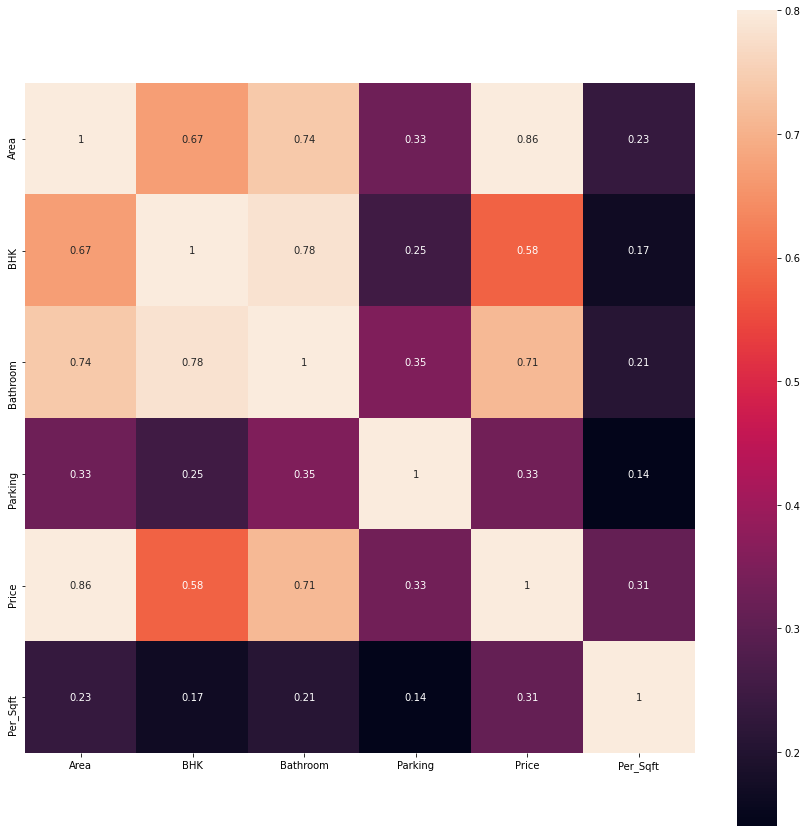

In [47]:
correlation = dt.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, vmax=.8, square=True, annot=True);

In [48]:
cols = ['BHK','Bathroom','Furnishing','Locality','Parking','Status','Transaction','Type']

In [49]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(dt[c].values)) 
    dt[c] = lbl.transform(list(dt[c].values))

In [50]:
y = dt['Price']

In [51]:
del dt['Price']

In [52]:
X = dt.values
y = y.values

In [53]:
# split the data into test and train.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [54]:
# Import Library for linear regression.
from sklearn import linear_model
model = linear_model.LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
print("Predict value " + str(model.predict([X_test[87]])))
print("Real value " + str(y_test[87]))

Predict value [3786161.32123022]
Real value 3000000


In [57]:
print("Score --> ", model.score(X_test, y_test))

Score -->  0.7841763017815072


In [58]:
# score:- here score shows that how much the  probability is correct to predict the price value.

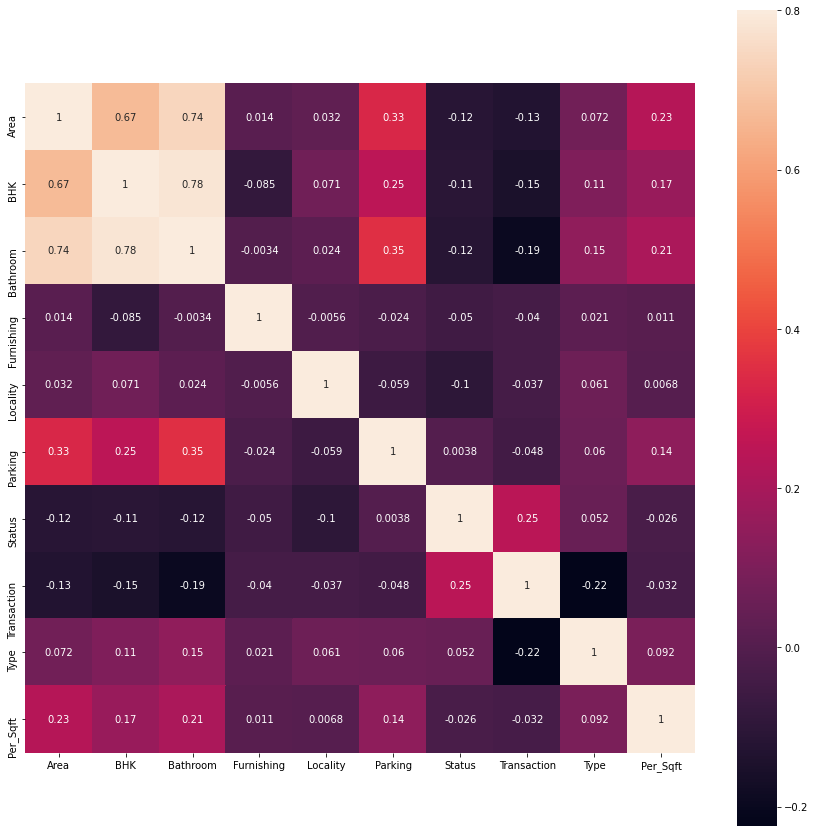

In [49]:
correlation = dt.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, vmax=.8, square=True, annot=True);